## This is my codes for Q(9) in HW5 of ML course in Tehran 

# SVM on iris dataset

In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import time 
import sklearn 
%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm



In [12]:
iris = datasets.load_iris()

In [13]:
data = iris.data[:, 2:]  # we only take the first two features.
targets= iris.target
print(list(iris.feature_names))
X_train,X_test,Y_train,Y_test = train_test_split(data,targets, test_size=0.3,random_state=40)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
def plot_contoures(sub,index,data,targets,clf_svm, title):
    data0, data1 = data[:, 0], data[:, 1]
    x_min, x_max = data0.min() - 1, data0.max() + 1
    y_min, y_max = data1.min() - 1, data1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

    Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = sub.flatten()[index].contourf(xx, yy, Z, alpha=0.7)
    sub.flatten()[index].scatter(data0, data1, c=targets, s=15, edgecolors='k')
    sub.flatten()[index].set_xlabel('Petal Length')
    sub.flatten()[index].set_ylabel('Petal Width')
    sub.flatten()[index].set_title(title)

Accuracy for SVM with linear kernel with one-vs-rest 1.0
Accuracy for SVM with linear kernel with one-vs-one 1.0
Accuracy for SVM with rbf kernel with one-vs-rest 1.0
Accuracy for SVM with polynomial kernel with one-vs-rest 0.9777777777777777


/home/alireza/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/alireza/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


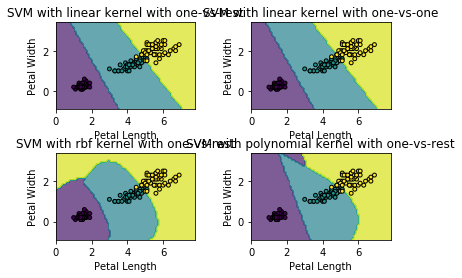

In [19]:
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.5) 

clf_svm1 = svm.SVC(kernel='linear', decision_function_shape='ovr').fit(X_train,Y_train)
print("Accuracy for SVM with linear kernel with one-vs-rest" , clf_svm1.score(X_test,Y_test))
plot_contoures(sub,0,data,targets,clf_svm1,"SVM with linear kernel with one-vs-rest")


clf_svm2 = svm.SVC(kernel='linear', decision_function_shape='ovo').fit(X_train,Y_train)
print("Accuracy for SVM with linear kernel with one-vs-one", clf_svm2.score(X_test,Y_test))
plot_contoures(sub,1,data,targets,clf_svm2,"SVM with linear kernel with one-vs-one")

clf_svm3 = svm.SVC(kernel='rbf', decision_function_shape='ovr').fit(X_train,Y_train)
print("Accuracy for SVM with rbf kernel with one-vs-rest" , clf_svm3.score(X_test,Y_test))
plot_contoures(sub,2,data,targets,clf_svm3,"SVM with rbf kernel with one-vs-rest")

clf_svm4 = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovr').fit(X_train,Y_train)
print("Accuracy for SVM with polynomial kernel with one-vs-rest", clf_svm4.score(X_test,Y_test))
plot_contoures(sub,3,data,targets,clf_svm4,"SVM with polynomial kernel with one-vs-rest")
plt.show()




